# Fundamental Trend Analysis
This notebook contains code for extracting fundamental data from an API and decomposing the series using the statsmodels library.

In [2]:
import pandas as pd
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go

import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import numpy as np
from IPython.display import clear_output
import time
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [5]:
# Obtain today's date
today = date.today()

## 1. Load Data

Neither the UniBit nor the Financial Modeling Prep API have enough historical company financial data for time series analysis. This quarterly revenue data was manually obtained from the annual statements released by Lowe's as directed in their Form 10-Ks.

In [15]:
low_revenue = pd.read_csv('additional_data/low_revenue.csv')
low_revenue['date'] = pd.to_datetime(low_revenue['date'])
low_revenue.set_index('date', inplace = True)
low_revenue.sort_index(inplace=True)
low_revenue.tail()

,low_revenue
date,
2019-08-01,20992
2019-11-01,17388
2020-01-31,16027
2020-04-30,19675
2020-07-30,27307


# 2. Apply Statsmodels Time Series Decompose To Both Periods of Data

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from stationarity_check_funtion import *

In [22]:
low_revenue_after_financial_crisis = low_revenue[low_revenue.index <='2011-01-28'].copy()
low_revenue_before_coronavirus = low_revenue[low_revenue.index >'2011-01-28'].copy()

In [38]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(low_revenue_after_financial_crisis['low_revenue'], model='multiplicative', period = 4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

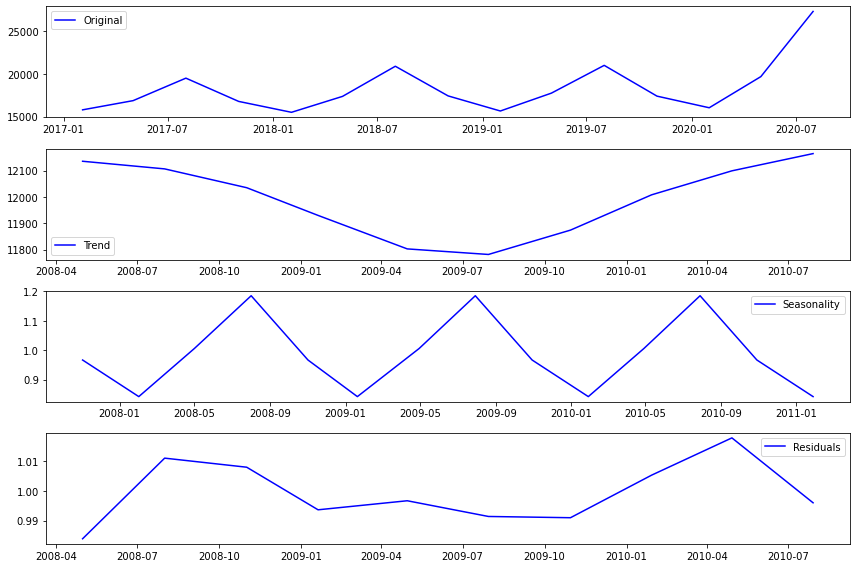

In [39]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(low_revenue_before_coronavirus['low_revenue'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [40]:
residual.dropna(inplace=True)
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -2.793260
p-value                        0.059243
#Lags Used                     3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64
